# APS 2 - REDES SOCIAIS

Os dados analisados neste conjunto de dados estão relacionados a um site de notícias sociais online, onde os usuários interagem uns com os outros. Na plataforma, os participantes têm a capacidade de expressar sua confiança em relação a outros usuários, formando assim uma complexa "Teia de Confiança" direcionada.

## Importando as bibliotecas necessárias

In [1]:
import netpixi
import graph_tool_extras as gte
from graph_tool import draw
import distribution as dst
from math import log
import csv

## Funções
Funções auxilares para construção do grafo.

In [29]:
g = gte.Graph(directed=False)

def get_or_add_edge(g, source, target):
    e = g.edge_by_ids(source, target)
    if e is None:
        e = g.add_edge_by_ids(source, target)
    return e

def get_or_add_vertex(g, id):
    u = g.vertex_by_id(id)
    if u is None:
        u = g.add_vertex_by_id(id)
    return u

## _Path_ para o dataset

In [30]:
PATH = 'feb-20-us-flight-delay.csv'

## Construção do grafo

In [34]:
dicionario = {}

with open(PATH, "r") as arquivo:
    arquivo.readline()
    read = csv.reader(arquivo)
    
    for i, linha in enumerate(read):
        origem = linha[4]
        destino = linha[5]

        # Incrementar o número de ocorrências do par de aeroportos
        par = (origem, destino)
        if par not in dicionario:
            dicionario[par] = 0
        dicionario[par] += 1

# Verificar se a aresta já existe
for par in dicionario:
    if dicionario[par] >= 1:
        # Criar a aresta
        u = get_or_add_vertex(g, par[0])
        v = get_or_add_vertex(g, par[1])
        e = get_or_add_edge(g, par[0], par[1])




## Otimização e reposicionamento das arestas

In [37]:
layout = draw.sfdp_layout(g)
gte.move(g, layout)

In [38]:
g = gte.clean(g)
gte.save(g, 'slashdot.net.gz')

## Visualização do grafo

In [39]:
r = netpixi.render('slashdot.net.gz', infinite=True)

r.vertex_set_key('id')

In [40]:
r.vertex_default(size=4, bwidth=1)

In [41]:
r.edge_default(width=1)

## Densidade e Transitividade

In [42]:
g = gte.load('../__shared__/slashdot.net.gz')

In [43]:
g.density()

4.62

In [44]:
g.transitivity()

32.12

## Distribuição de Degree

In [45]:
degrees = g.get_total_degrees()

In [46]:
degrees.describe()

count    350.000000
mean      16.114286
std       27.318950
min        1.000000
25%        2.000000
50%        5.000000
75%       16.000000
max      175.000000
dtype: float64

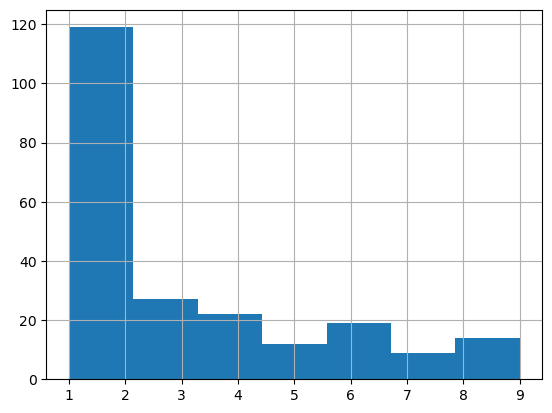

In [47]:
degrees[degrees<10].hist(bins=7);

## Power law

In [48]:
dst.not_normal(degrees)

1.224583188680337e-54

In [49]:
dst.more_powerlaw_than_lognormal(degrees)

Calculating best minimal value for power law fit


(False, 0.4479195494375472)

In [50]:
dst.more_powerlaw_than_exponential(degrees)

Calculating best minimal value for power law fit


(False, 0.46930840937943485)

## Distribuição de Distância

In [51]:
distances = g.get_distances()

In [52]:
distances.describe()

count    122500.000000
mean          2.405012
std           0.692421
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           6.000000
dtype: float64

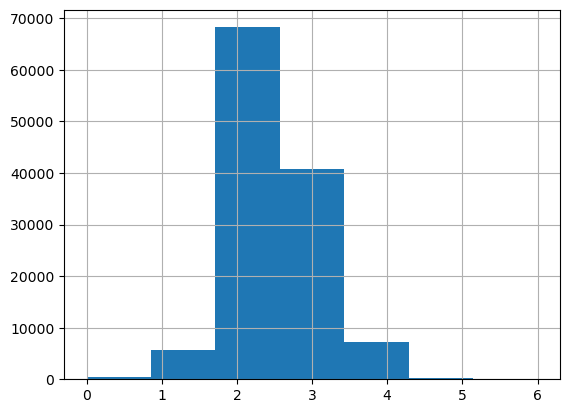

In [53]:
distances.hist(bins=7);

In [54]:
log(g.num_vertices())

5.857933154483459